### Load the libraries

In [131]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [132]:
d2 = pd.read_csv('data/D2.csv')

In [133]:
d2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[80-90),1,3,7,1,Invalid,33,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[70-80),1,3,5,3,Invalid,48,2,...,No,No,No,No,No,No,Steady,False,True,1
2,Caucasian,Female,[50-60),3,1,1,3,Orthopedics,25,1,...,No,No,No,No,No,No,Steady,False,True,0
3,AfricanAmerican,Female,[50-60),1,1,7,6,Invalid,41,0,...,No,No,No,No,No,No,Steady,False,True,1
4,AfricanAmerican,Male,[80-90),1,3,7,4,Invalid,22,0,...,No,No,No,No,No,No,Steady,False,True,1


In [134]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [135]:
d2_cluster = d2[['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital']]

In [136]:
d2_cluster

,num_lab_procedures,number_outpatient,number_inpatient,num_medications,time_in_hospital
0,33,0,1,14,1
1,48,0,2,7,3
2,25,0,0,15,3
3,41,0,0,19,6
4,22,0,1,12,4
...,...,...,...,...,...
19995,51,3,2,12,4
19996,57,3,5,28,9
19997,41,0,0,18,3
19998,49,0,5,15,3


### Data Preprocessing

#### Check for distributions of data to determine what transformations are needed

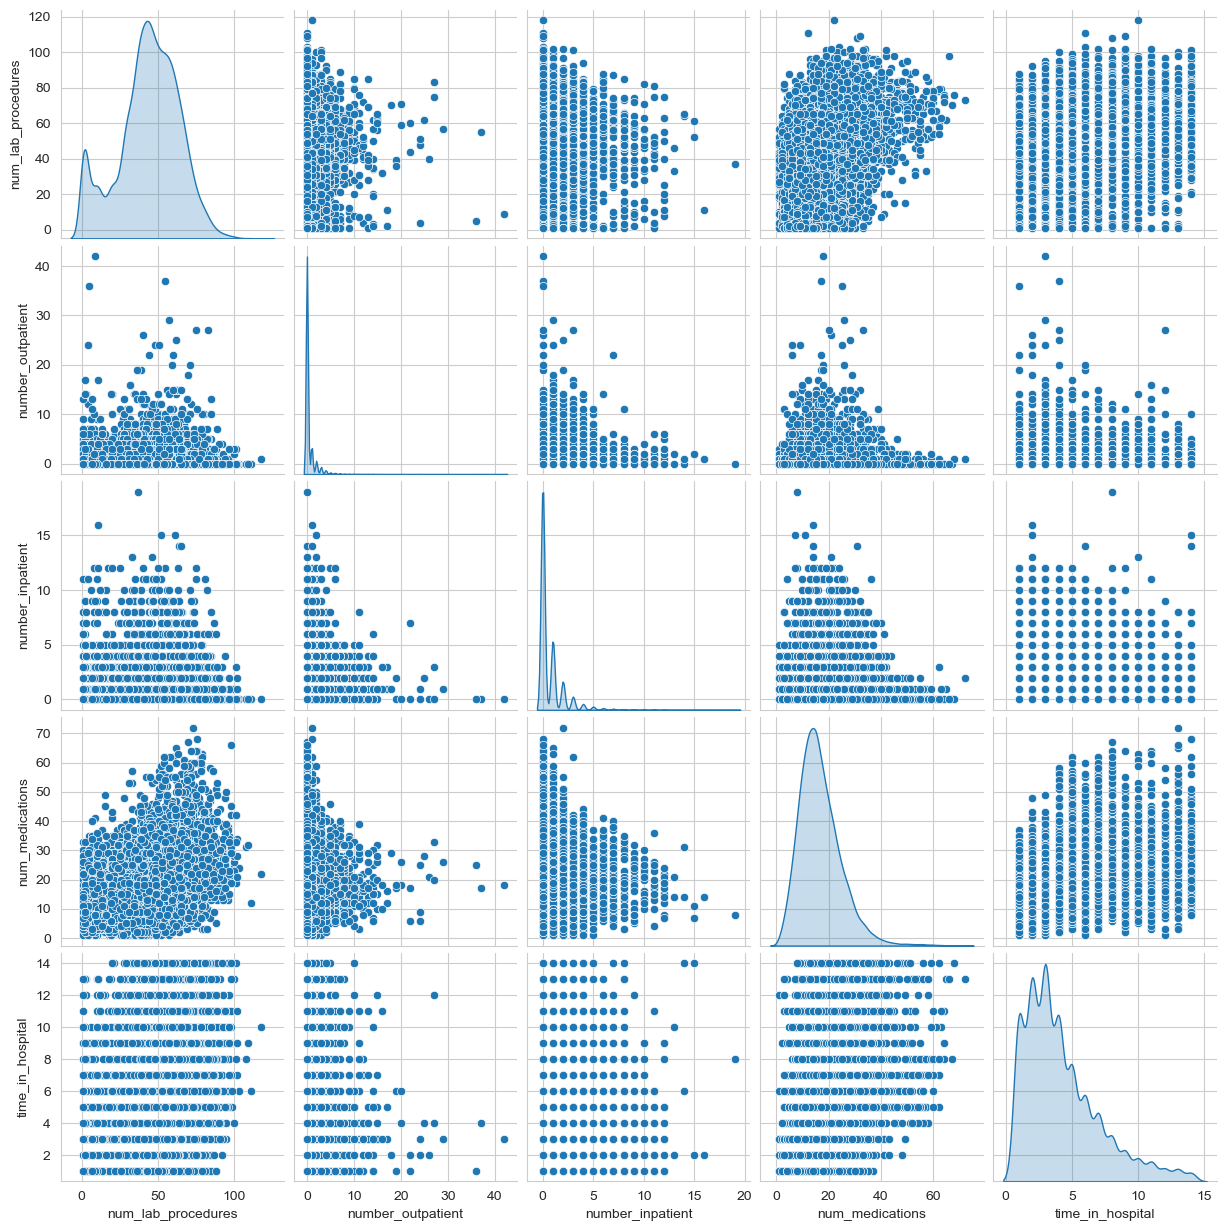

In [137]:
# make a seborn plot of the data to show the distribution of the data
sns.pairplot(d2_cluster, diag_kind='kde')
plt.show()

- num_lab_procedures and num_medications: These are roughly normally distributed, so no transformation is needed for these.
- number_outpatient and number_inpatient: These are still highly skewed with many zero values, making them good candidates for log or square root transformation.
- time_in_hospital: This feature is slightly skewed, but the need for transformation is optional.

In [138]:
d2_cluster.loc[:, 'number_inpatient_sqrt'] = np.sqrt(d2_cluster['number_inpatient'])
d2_cluster.loc[:, 'number_outpatient_sqrt'] = np.sqrt(d2_cluster['number_outpatient'])

C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_24076\3936829568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:, 'number_inpatient_sqrt'] = np.sqrt(d2_cluster['number_inpatient'])
C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_24076\3936829568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:, 'number_outpatient_sqrt'] = np.sqrt(d2_cluster['number_outpatient'])


#### Show the distributions after transformation

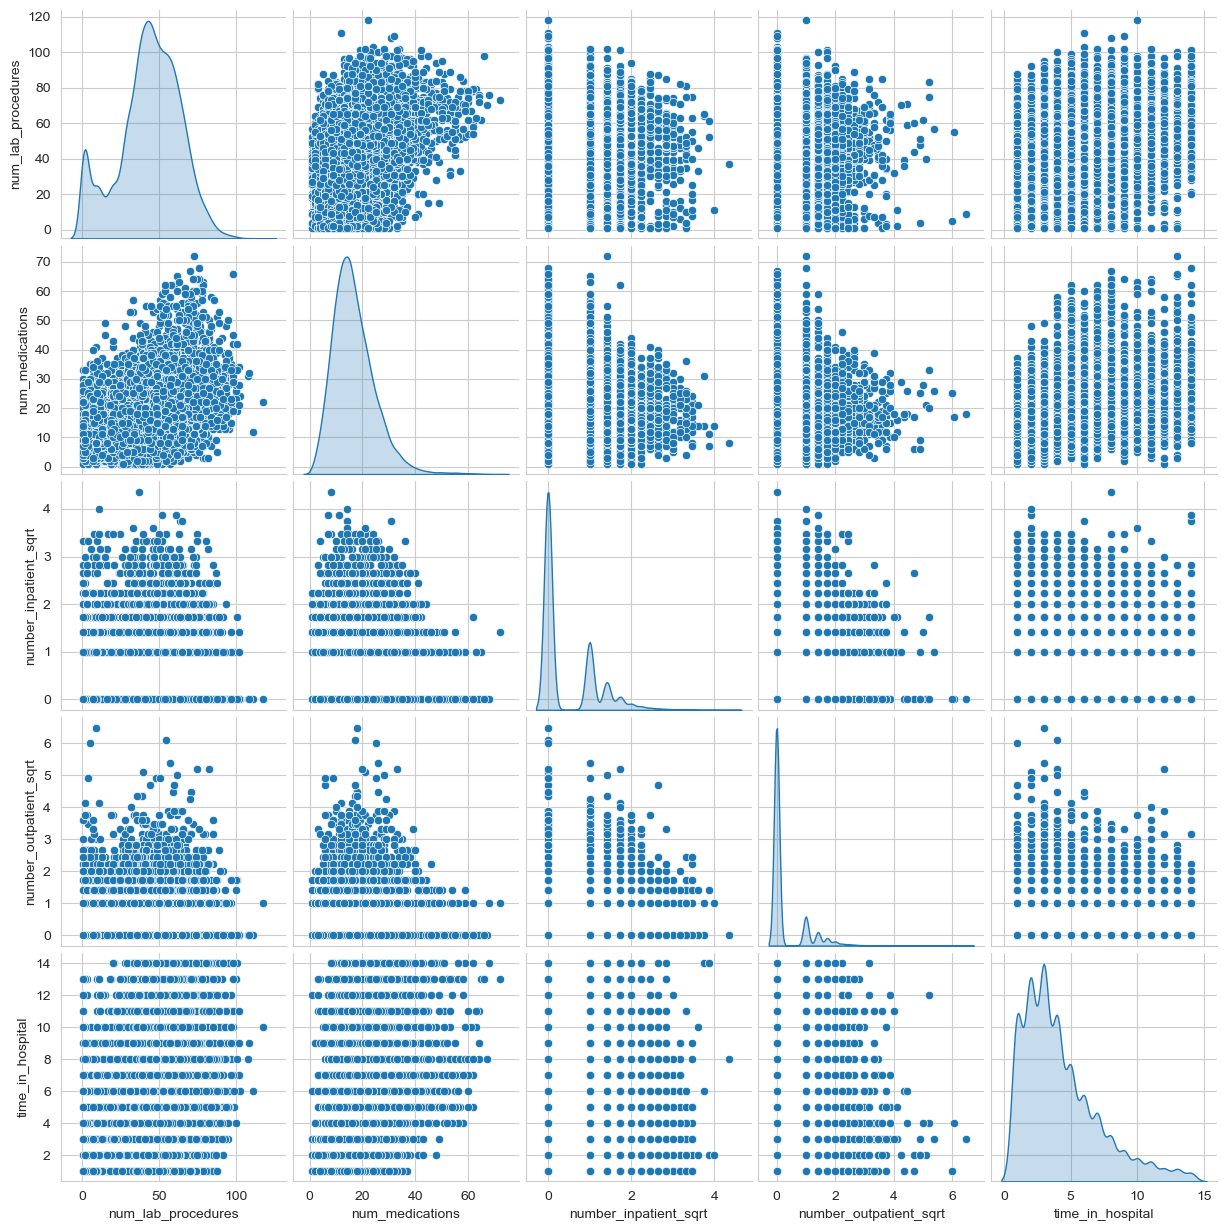

In [139]:
sns.pairplot(d2_cluster[['num_lab_procedures', 'num_medications', 'number_inpatient_sqrt', 'number_outpatient_sqrt',
                         'time_in_hospital']], diag_kind='kde')

In [140]:
d2_kmeans = d2_cluster[
    ['num_lab_procedures', 'num_medications', 'number_inpatient_sqrt', 'number_outpatient_sqrt', 'time_in_hospital']]

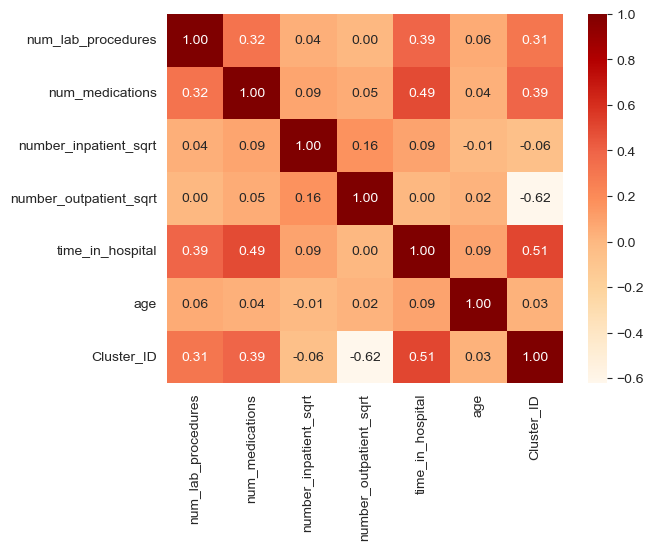

In [218]:
# plot a correlation matrix for d2_cluster
corr = d2_age_cluster.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='OrRd')
plt.show()

In [142]:
from sklearn.cluster import KMeans

In [143]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

standard_scaler = StandardScaler()

In [144]:
d2_kmeans

,num_lab_procedures,num_medications,number_inpatient_sqrt,number_outpatient_sqrt,time_in_hospital
0,33,14,1.000000,0.000000,1
1,48,7,1.414214,0.000000,3
2,25,15,0.000000,0.000000,3
3,41,19,0.000000,0.000000,6
4,22,12,1.000000,0.000000,4
...,...,...,...,...,...
19995,51,12,1.414214,1.732051,4
19996,57,28,2.236068,1.732051,9
19997,41,18,0.000000,0.000000,3
19998,49,15,2.236068,0.000000,3


In [145]:
d2_scaled = standard_scaler.fit_transform(d2_kmeans)

In [146]:
d2_scaled = pd.DataFrame(d2_scaled, columns=d2_kmeans.columns)

In [147]:
d2_scaled

,num_lab_procedures,num_medications,number_inpatient_sqrt,number_outpatient_sqrt,time_in_hospital
0,-0.538604,-0.335225,0.762057,-0.475053,-1.132051
1,0.213377,-1.204907,1.362099,-0.475053,-0.430385
2,-0.939660,-0.210985,-0.686572,-0.475053,-0.430385
3,-0.137547,0.285976,-0.686572,-0.475053,0.622115
4,-1.090057,-0.583706,0.762057,-0.475053,-0.079551
...,...,...,...,...,...
19995,0.363773,-0.583706,1.362099,2.204946,-0.079551
19996,0.664566,1.404139,2.552660,2.204946,1.674615
19997,-0.137547,0.161736,-0.686572,-0.475053,-0.430385
19998,0.263509,-0.210985,2.552660,-0.475053,-0.430385


In [148]:
X = d2_scaled

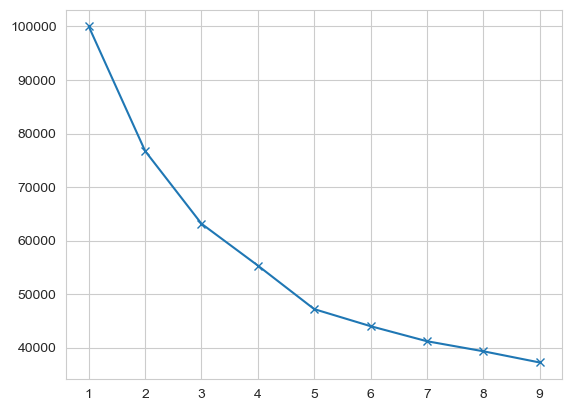

In [149]:
clusters = []
inertia_vals = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)

    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.plot(range(1, 10), inertia_vals, marker='x')

In [150]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for k=2 through k=5
silhouette_scores = {}

for k in range(2, 6):  # Focusing on k = 2, 3, 4, 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(d2_scaled)
    silhouette_avg = silhouette_score(d2_scaled, cluster_labels)
    silhouette_scores[k] = silhouette_avg

# Display the silhouette scores
silhouette_scores


{2: 0.24868708097710737,
 3: 0.26573033163962045,
 4: 0.20088242389151328,
 5: 0.23122933065926662}

In [151]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [152]:
print("Sum of intra-cluster distance:", model.inertia_)

Sum of intra-cluster distance: 63142.229561314605


In [153]:
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Centroid locations:
[-0.01666601 -0.01631081  0.42766277  1.86548467 -0.16297762]
[-0.36842673 -0.46599708 -0.20425201 -0.43009811 -0.51519691]
[ 0.7139735   0.90012942  0.12779748 -0.32284952  1.08408262]


In [154]:
d2_cluster = d2_cluster[
    ['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital']]

In [155]:
d2_cluster

,num_lab_procedures,number_outpatient,number_inpatient,num_medications,time_in_hospital
0,33,0,1,14,1
1,48,0,2,7,3
2,25,0,0,15,3
3,41,0,0,19,6
4,22,0,1,12,4
...,...,...,...,...,...
19995,51,3,2,12,4
19996,57,3,5,28,9
19997,41,0,0,18,3
19998,49,0,5,15,3


In [156]:
y = model.predict(X)
d2_cluster.loc[:, 'Cluster_ID'] = y

C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_24076\4179053762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:, 'Cluster_ID'] = y


In [157]:
print("Cluster membership")
print(d2_cluster['Cluster_ID'].value_counts())

Cluster membership
Cluster_ID
1    10842
2     5668
0     3490
Name: count, dtype: int64


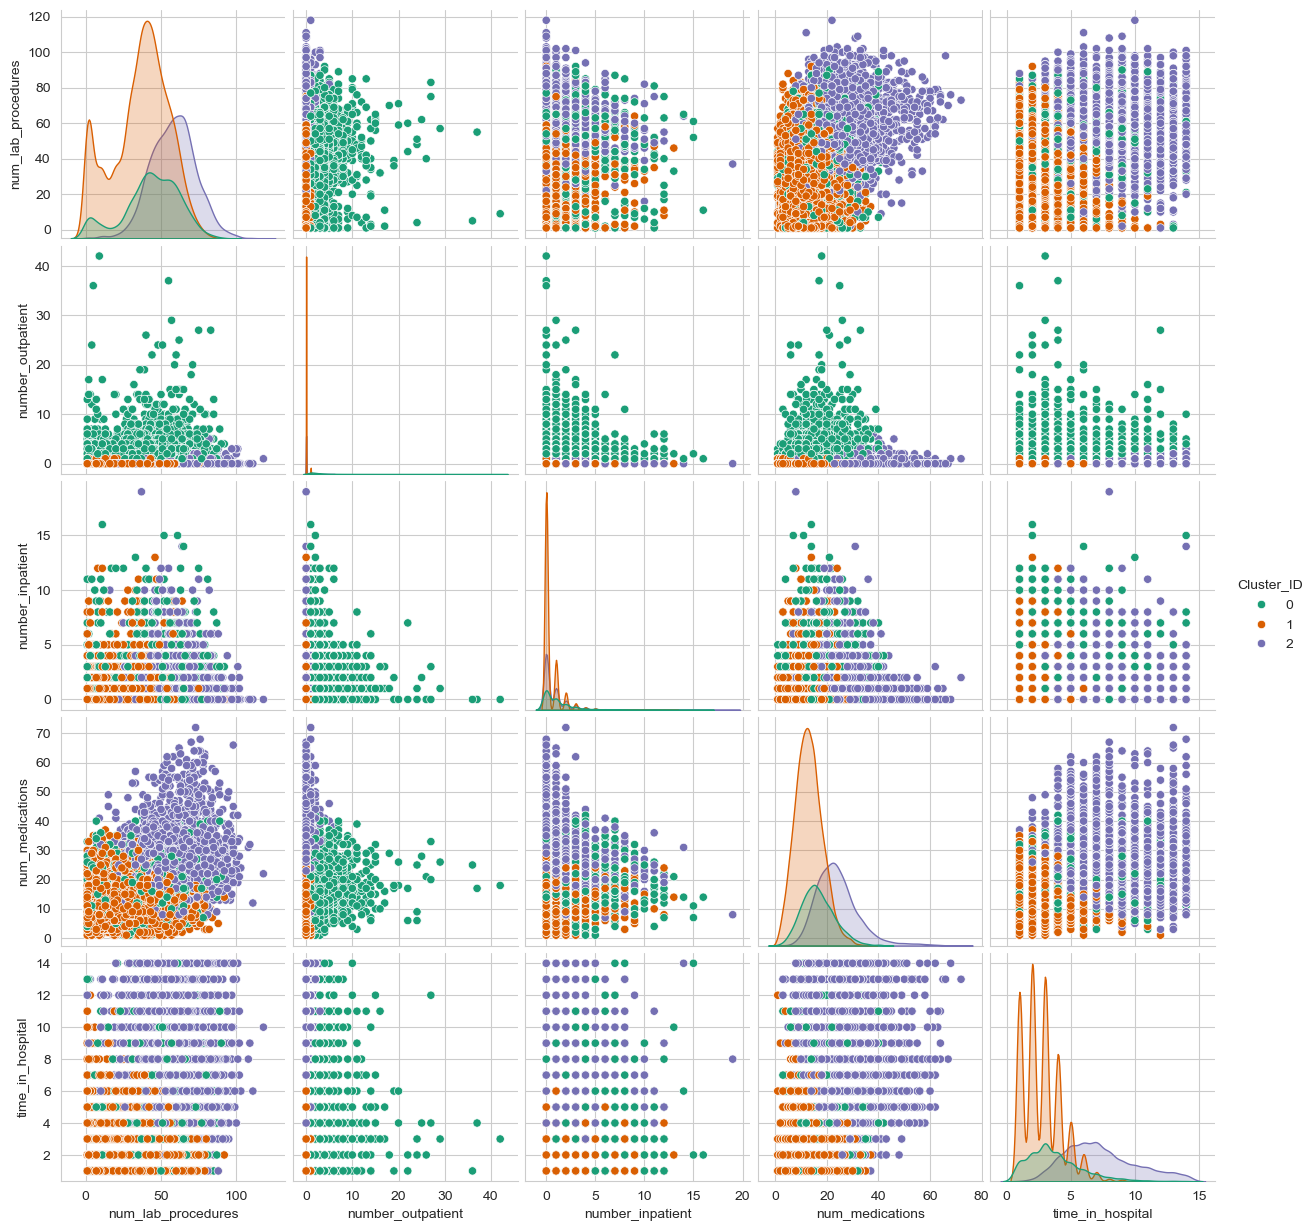

In [158]:
cluster_g = sns.pairplot(d2_cluster, hue='Cluster_ID', diag_kind='kde', palette='Dark2')
plt.show()

In [199]:
d2_age_cluster = d2[['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital', 'age']]

In [201]:
d2_age_cluster.loc[:, 'age'] = d2_age_cluster['age'].astype('str')

In [202]:
d2_age_cluster['age'].unique()

array(['[80-90)', '[70-80)', '[50-60)', '[40-50)', '[60-70)', '[90-100)',
       '[30-40)', '[10-20)', '[20-30)', '[0-10)'], dtype=object)

In [203]:
age_map = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7,
           '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}

In [204]:
d2_age_cluster.loc[:, 'age'] = d2_age_cluster['age'].map(age_map)

In [205]:
from kmodes.kprototypes import KPrototypes

In [207]:
d2_age_cluster = d2_kmeans[['num_lab_procedures', 'num_medications', 'number_inpatient_sqrt', 'number_outpatient_sqrt',
                             'time_in_hospital']].merge(d2_age_cluster['age'], left_index=True, right_index=True)

In [208]:
d2_age_cluster

,num_lab_procedures,num_medications,number_inpatient_sqrt,number_outpatient_sqrt,time_in_hospital,age
0,33,14,1.000000,0.000000,1,9
1,48,7,1.414214,0.000000,3,8
2,25,15,0.000000,0.000000,3,6
3,41,19,0.000000,0.000000,6,6
4,22,12,1.000000,0.000000,4,9
...,...,...,...,...,...,...
19995,51,12,1.414214,1.732051,4,8
19996,57,28,2.236068,1.732051,9,6
19997,41,18,0.000000,0.000000,3,9
19998,49,15,2.236068,0.000000,3,6


In [209]:
scaler = StandardScaler()

In [210]:
X = d2_age_cluster.to_numpy()

In [211]:
X = scaler.fit_transform(X)

In [212]:
X

array([[-0.53860386, -0.33522509,  0.76205691, -0.47505281, -1.13205122,
         1.15607496],
       [ 0.21337711, -1.20490696,  1.36209853, -0.47505281, -0.4303847 ,
         0.51801168],
       [-0.93966038, -0.21098482, -0.6865717 , -0.47505281, -0.4303847 ,
        -0.75811489],
       ...,
       [-0.13754735,  0.16173598, -0.6865717 , -0.47505281, -0.4303847 ,
         1.15607496],
       [ 0.26350917, -0.21098482,  2.55266034, -0.47505281, -0.4303847 ,
        -0.75811489],
       [ 0.51416949, -0.33522509, -0.6865717 ,  1.71315679,  1.3237816 ,
         1.15607496]])

In [213]:
d2_scaled

,num_lab_procedures,num_medications,number_inpatient_sqrt,number_outpatient_sqrt,time_in_hospital
0,-0.538604,-0.335225,0.762057,-0.475053,-1.132051
1,0.213377,-1.204907,1.362099,-0.475053,-0.430385
2,-0.939660,-0.210985,-0.686572,-0.475053,-0.430385
3,-0.137547,0.285976,-0.686572,-0.475053,0.622115
4,-1.090057,-0.583706,0.762057,-0.475053,-0.079551
...,...,...,...,...,...
19995,0.363773,-0.583706,1.362099,2.204946,-0.079551
19996,0.664566,1.404139,2.552660,2.204946,1.674615
19997,-0.137547,0.161736,-0.686572,-0.475053,-0.430385
19998,0.263509,-0.210985,2.552660,-0.475053,-0.430385


In [214]:
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2, n_jobs=10)
clusters = kproto.fit_predict(X, categorical=[5])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


In [215]:
d2_age_cluster.loc[:, 'Cluster_ID'] = clusters

In [216]:
d2_age_cluster

,num_lab_procedures,num_medications,number_inpatient_sqrt,number_outpatient_sqrt,time_in_hospital,age,Cluster_ID
0,33,14,1.000000,0.000000,1,9,1
1,48,7,1.414214,0.000000,3,8,1
2,25,15,0.000000,0.000000,3,6,1
3,41,19,0.000000,0.000000,6,6,2
4,22,12,1.000000,0.000000,4,9,1
...,...,...,...,...,...,...,...
19995,51,12,1.414214,1.732051,4,8,0
19996,57,28,2.236068,1.732051,9,6,0
19997,41,18,0.000000,0.000000,3,9,1
19998,49,15,2.236068,0.000000,3,6,1


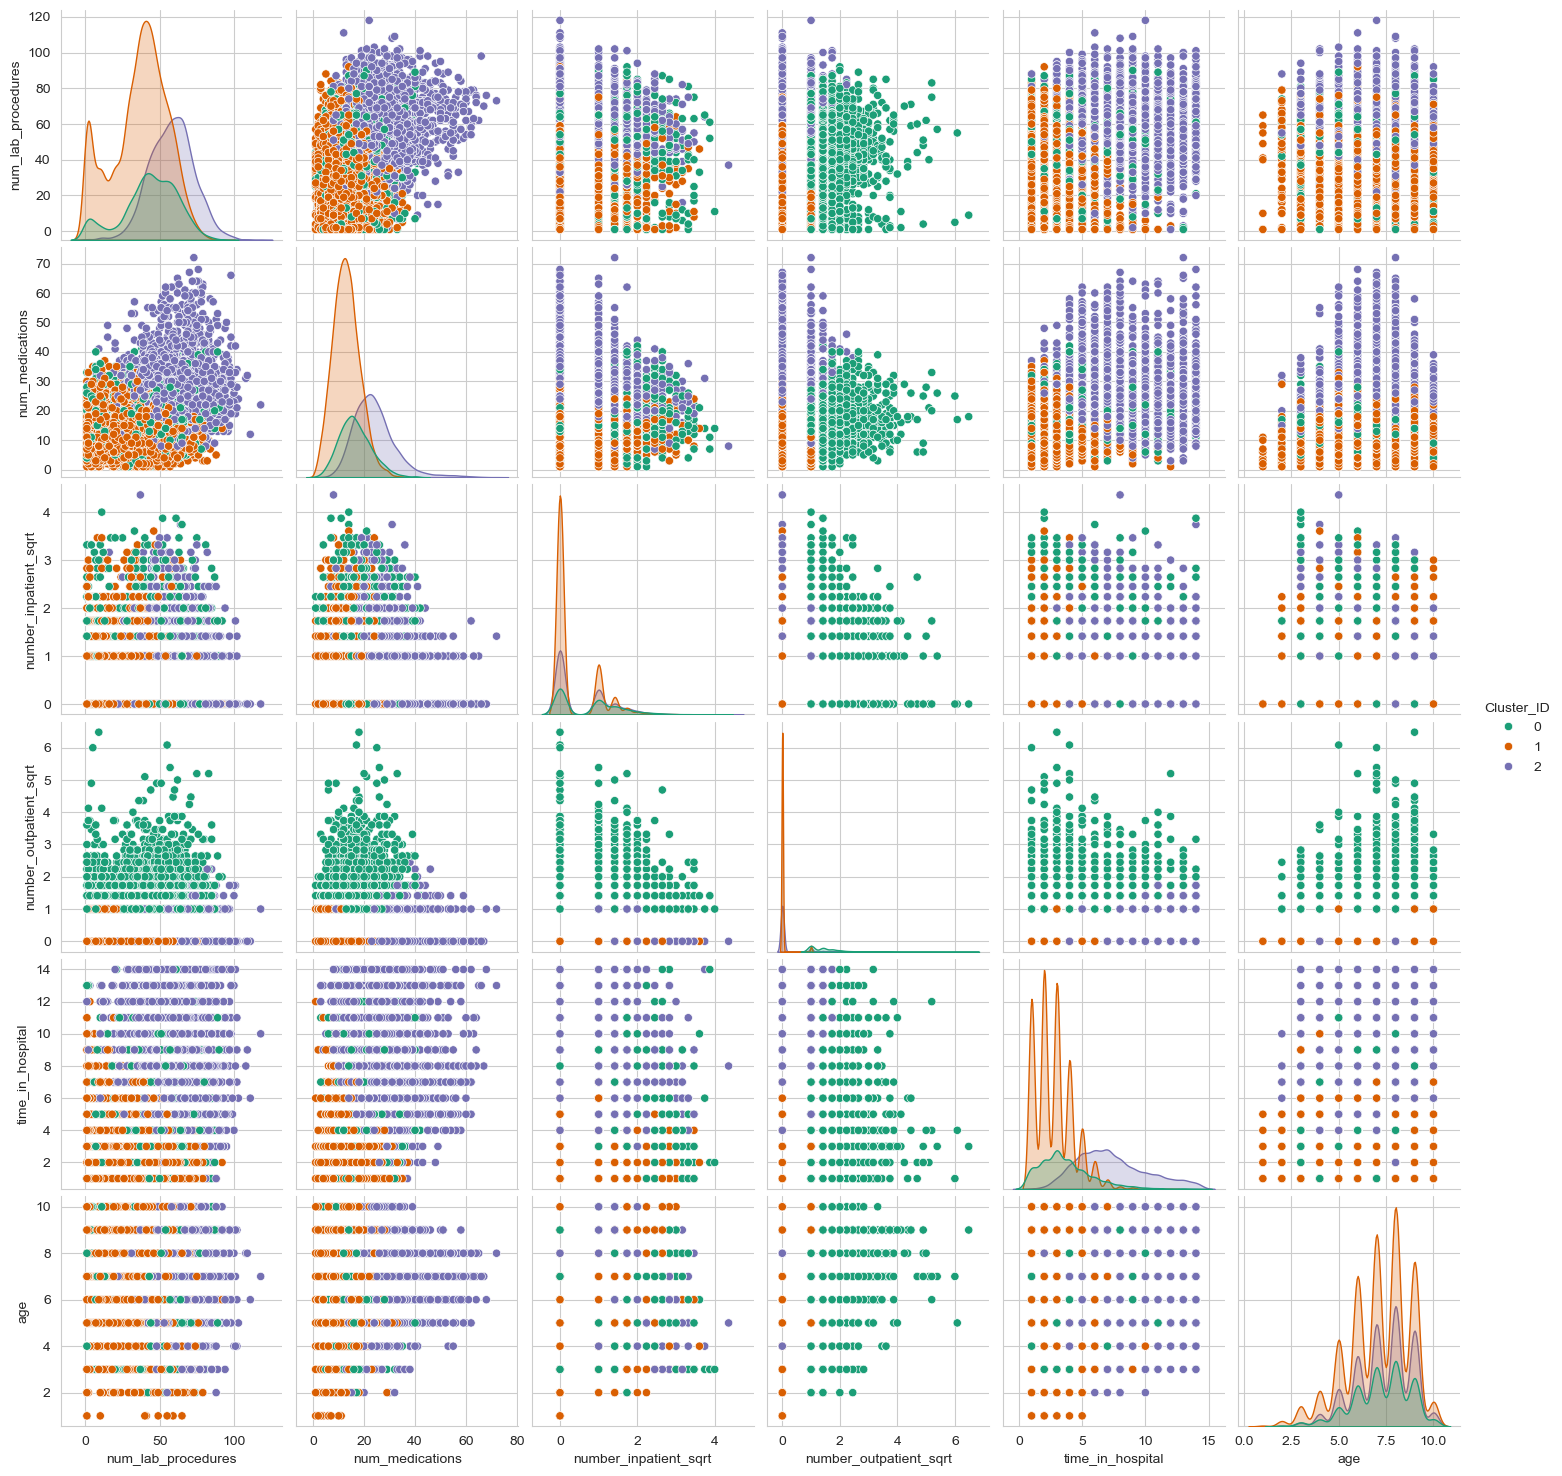

In [217]:
sns.pairplot(d2_age_cluster, hue='Cluster_ID', diag_kind='kde', palette='Dark2')